# Algoritmos de Ordenação

**Alunos**: 
* Lindomar Rodrigues de Azevedo
* Rafael Silva Tavares
* Gabriel Tavares dos Santos
* Izabela Caldeira Sena



In [16]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 4.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


In [6]:
import os
import datetime
import matplotlib.pyplot as plt
import random
import time

# Bubble Sort

O Bubble Sort é um dos algoritmos de ordenação mais simples. Seu nome vem da maneira como o algoritmo funciona: a cada nova passagem, o maior elemento da lista “borbulha” em direção à sua posição correta.

O Bubble Sort consiste em fazer várias passagens por uma lista, comparar os elementos um por um e trocar itens adjacentes que estão fora de ordem.

- o método é estável
- in place
- um algoritmo de ordenação simples que precisa de O(n2) comparações para
ordenar n itens
é recomendado para conjuntos que estejam praticamente ordenados, pois o
número de movimentações será baixo ou até mesmo zero (em caso do conjunto
estar ordenado)
não é recomendado para conjuntos grandes e muito desordenados, pois teríamos
um grande número de movimentações.


In [7]:
def bubble_sort(array):
  inicio = datetime.datetime.now()
  comparacoes = 0
  trocas = 0


  for i in range(len(array)):
    for j in range(0, len(array) - i - 1):
      comparacoes += 1
      if array[j] > array[j + 1]:
        trocas += 1
        temp = array[j]
        array[j] = array[j+1]
        array[j+1] = temp
  return (datetime.datetime.now()-inicio ).total_seconds(), comparacoes, trocas

# Insertion Sort

Assim como a ordenação por bolha, o algoritmo de ordenação por inserção é simples de implementar e entender. Mas, ao contrário do bubble sort, ele constrói a lista ordenada um elemento de cada vez, comparando cada item com o resto da lista e inserindo-o em sua posição correta. Esse procedimento de “inserção” dá nome ao algoritmo.

- O método é estavél
- In place
- O tempo de execução do algoritmo Insertion-Sort depende fundamentalmente
da seqüência dos dados de entrada
- Se os dados já estão em ordem, então o Insertion-Sort é executado, no
melhor caso, em tempo O(n), se eles estão em ordem decrescente ele é
executado, no pior caso, em tempo O(n^2)


In [8]:
def insertion_sort(array):
  inicio = datetime.datetime.now()
  trocas = 0

  for i in range(1, len(array)):
      key_item = array[i]
      j = i - 1
      
      while j >= 0 and array[j] > key_item:
          trocas += 1
          array[j + 1] = array[j]
          j -= 1
      array[j + 1] = key_item
  return (datetime.datetime.now()-inicio).total_seconds(), trocas

# Selection Sort

Assim como o Bubble Sort, é necessário para cada item da lista percorrê-la toda, sendo necessário dois loops encadeados, ou seja, um para cada elemento da lista e outro para cada um desses elementos percorrerem a lista toda.

In [9]:
def selection_sort(array):
    inicio = datetime.datetime.now()
    cont = 0
    cont2 = 0
    for index in range(0, len(array)):
        min_index = index

        for right in range(index + 1, len(array)):
            cont2 += 1
            if array[right] < array[min_index]:
                min_index = right
                cont +=1

        array[index], array[min_index] = array[min_index], array[index]

    return ((datetime.datetime.now()-inicio).total_seconds(),cont, cont2)

# Merge Sort

A partir da entrada de um vetor A de n números, é repetido o processo de divisão do vetor em duas metados até chegar o ponto em que teremos vários vetores de um elemento apenas. Após isso é feita a junção (merge) dos vetores, de incio ele combina todos os vetores de tamanho um, formando vetores de tamanho dois e assim por diante.

In [10]:
def merge(A, aux, esquerda, meio, direita, comparacao=0, trocas=0):
    """
    Combina dois vetores ordenados em um único vetor (também ordenado).
    """
    for k in range(esquerda, direita + 1):
        aux[k] = A[k]
        trocas+=1
    i = esquerda
    j = meio + 1
    for k in range(esquerda, direita + 1):
        if i > meio:
            A[k] = aux[j]
            j += 1
            comparacao+=1
            trocas+=1
        elif j > direita:
            A[k] = aux[i]
            i += 1
            comparacao+=2
            trocas+=1
        elif aux[j] < aux[i]:
            A[k] = aux[j]
            j += 1
            comparacao+=3
            trocas+=1
        else:
            A[k] = aux[i]
            i += 1
            comparacao+=3
            trocas+=1
    return(comparacao, trocas)


def mergesort(A, aux, esquerda, direita, comparacao=0):
    inicio = datetime.datetime.now()
    troca = 0
    if direita <= esquerda:
        comparacao +=1
        return
    meio = (esquerda + direita) // 2

    # Ordena a primeira metade do arranjo.
    mergesort(A, aux, esquerda, meio, comparacao)

    # Ordena a segunda metade do arranjo.
    mergesort(A, aux, meio + 1, direita, comparacao)

    # Combina as duas metades ordenadas anteriormente.
    comparacao, trocas = merge(A, aux, esquerda, meio, direita, comparacao, troca)
    return ((datetime.datetime.now()-inicio).total_seconds(),comparacao, trocas)

# Preparando dados a serem ordenados

In [11]:
data_crescente = [[i for i in range(0, qt)] for qt in [10,50,100,500,1000,5000,10000]]
data_decrescente = [[i for i in range(qt, 0, -1)] for qt in [10,50,100,500,1000,5000,10000]]
data_aleatorio = [x_.copy() for x_ in data_decrescente.copy()]

[random.shuffle(data_aleatorio[i]) for i in range(len(data_aleatorio))]

[None, None, None, None, None, None, None]

# Executando os algoritmos

In [12]:
performance_bubble_crescente = []
performance_bubble_decrescente = []
performance_bubble_aleatorio = []

performance_insertion_crescente = []
performance_insertion_decrescente = []
performance_insertion_aleatorio = []

performance_merge_crescente = []
performance_merge_decrescente = []
performance_merge_aleatorio = []


performance_selection_crescente = []
performance_selection_decrescente = []
performance_selection_aleatorio = []

for i in range(len(data_crescente)):
  performance_bubble_crescente.append([len(data_crescente[i]), *bubble_sort(data_crescente[i].copy())])
  performance_bubble_decrescente.append([len(data_crescente[i]), *bubble_sort(data_decrescente[i].copy())])
  performance_bubble_aleatorio.append([len(data_crescente[i]), *bubble_sort(data_aleatorio[i].copy())])

  performance_insertion_crescente.append([len(data_crescente[i]), *insertion_sort(data_crescente[i].copy())])
  performance_insertion_decrescente.append([len(data_crescente[i]), *insertion_sort(data_decrescente[i].copy())])
  performance_insertion_aleatorio.append([len(data_crescente[i]), *insertion_sort(data_aleatorio[i].copy())])

  performance_selection_crescente.append([len(data_crescente[i]), *selection_sort(data_crescente[i].copy())])
  performance_selection_decrescente.append([len(data_crescente[i]), *selection_sort(data_decrescente[i].copy())])
  performance_selection_aleatorio.append([len(data_crescente[i]), *selection_sort(data_aleatorio[i].copy())])

  aux1=[0]*len(data_crescente[i])
  aux2=[0]*len(data_crescente[i])
  aux3=[0]*len(data_crescente[i])

  performance_merge_crescente.append([len(data_crescente[i]), *mergesort(data_crescente[i].copy(),aux1,0,len(data_crescente[i])-1)])
  performance_merge_decrescente.append([len(data_crescente[i]), *mergesort(data_decrescente[i].copy(),aux2,0,len(data_crescente[i])-1)])
  performance_merge_aleatorio.append([len(data_crescente[i]), *mergesort(data_aleatorio[i].copy(),aux3,0,len(data_crescente[i])-1)])

# Resultados

## Tempo de execução

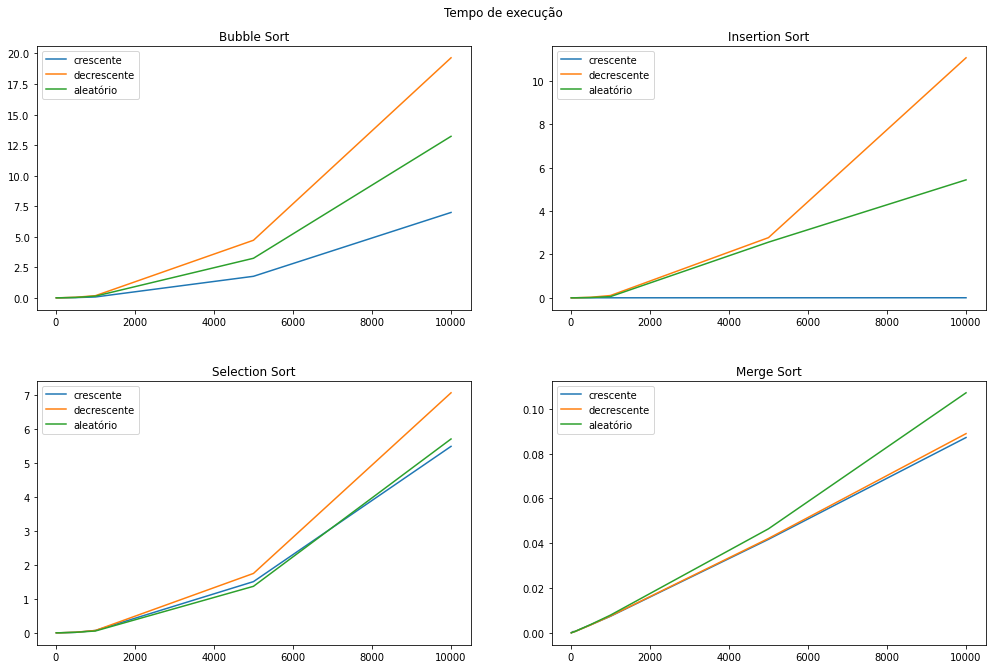

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=5.0)

fig.suptitle('Tempo de execução')

axs[0,0].plot([a[0] for a in performance_bubble_crescente], [a[1] for a in performance_bubble_crescente], label="crescente")
axs[0,0].plot([a[0] for a in performance_bubble_decrescente], [a[1] for a in performance_bubble_decrescente], label="decrescente")
axs[0,0].plot([a[0] for a in performance_bubble_aleatorio], [a[1] for a in performance_bubble_aleatorio], label="aleatório")

axs[0,0].set_title('Bubble Sort')
axs[0,0].legend()

axs[0,1].plot([a[0] for a in performance_insertion_crescente], [a[1] for a in performance_insertion_crescente], label="crescente")
axs[0,1].plot([a[0] for a in performance_insertion_decrescente], [a[1] for a in performance_insertion_decrescente], label="decrescente")
axs[0,1].plot([a[0] for a in performance_insertion_aleatorio], [a[1] for a in performance_insertion_aleatorio], label="aleatório")

axs[0,1].set_title('Insertion Sort')
axs[0,1].legend()

axs[1,0].plot([a[0] for a in performance_selection_crescente], [a[1] for a in performance_selection_crescente], label="crescente")
axs[1,0].plot([a[0] for a in performance_selection_decrescente], [a[1] for a in performance_selection_decrescente], label="decrescente")
axs[1,0].plot([a[0] for a in performance_selection_aleatorio], [a[1] for a in performance_selection_aleatorio], label="aleatório")

axs[1,0].set_title('Selection Sort')
axs[1,0].legend()

axs[1,1].plot([a[0] for a in performance_merge_crescente], [a[1] for a in performance_merge_crescente], label="crescente")
axs[1,1].plot([a[0] for a in performance_merge_decrescente], [a[1] for a in performance_merge_decrescente], label="decrescente")
axs[1,1].plot([a[0] for a in performance_merge_aleatorio], [a[1] for a in performance_merge_aleatorio], label="aleatório")

axs[1,1].set_title('Merge Sort')
axs[1,1].legend()

fig.show()

## Quantidade de comparações

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=5.0)

fig.suptitle('Quantidade de comparações')

axs[0,0].plot([a[0] for a in performance_bubble_crescente], [a[2] for a in performance_bubble_crescente], label="crescente")
axs[0,0].plot([a[0] for a in performance_bubble_decrescente], [a[2] for a in performance_bubble_decrescente], label="decrescente")
axs[0,0].plot([a[0] for a in performance_bubble_aleatorio], [a[2] for a in performance_bubble_aleatorio], label="aleatório")

axs[0,0].set_title('Bubble Sort')
axs[0,0].legend()

axs[0,1].plot([a[0] for a in performance_selection_crescente], [a[2] for a in performance_selection_crescente], label="crescente")
axs[0,1].plot([a[0] for a in performance_selection_decrescente], [a[2] for a in performance_selection_decrescente], label="decrescente")
axs[0,1].plot([a[0] for a in performance_selection_aleatorio], [a[2] for a in performance_selection_aleatorio], label="aleatório")

axs[0,1].set_title('Selection Sort')
axs[0,1].legend()

axs[1,0].plot([a[0] for a in performance_insertion_crescente], [a[2] for a in performance_insertion_crescente], label="crescente")
axs[1,0].plot([a[0] for a in performance_insertion_decrescente], [a[2] for a in performance_insertion_decrescente], label="decrescente")
axs[1,0].plot([a[0] for a in performance_insertion_aleatorio], [a[2] for a in performance_insertion_aleatorio], label="aleatório")

axs[1,0].set_title('Insertion Sort')
axs[1,0].legend()

axs[1,1].plot([a[0] for a in performance_merge_crescente], [a[2] for a in performance_merge_crescente], label="crescente")
axs[1,1].plot([a[0] for a in performance_merge_decrescente], [a[2] for a in performance_merge_decrescente], label="decrescente")
axs[1,1].plot([a[0] for a in performance_merge_aleatorio], [a[2] for a in performance_merge_aleatorio], label="aleatório")

axs[1,1].set_title('Merge Sort')
axs[1,1].legend()



fig.show()

## Quantidade de trocas

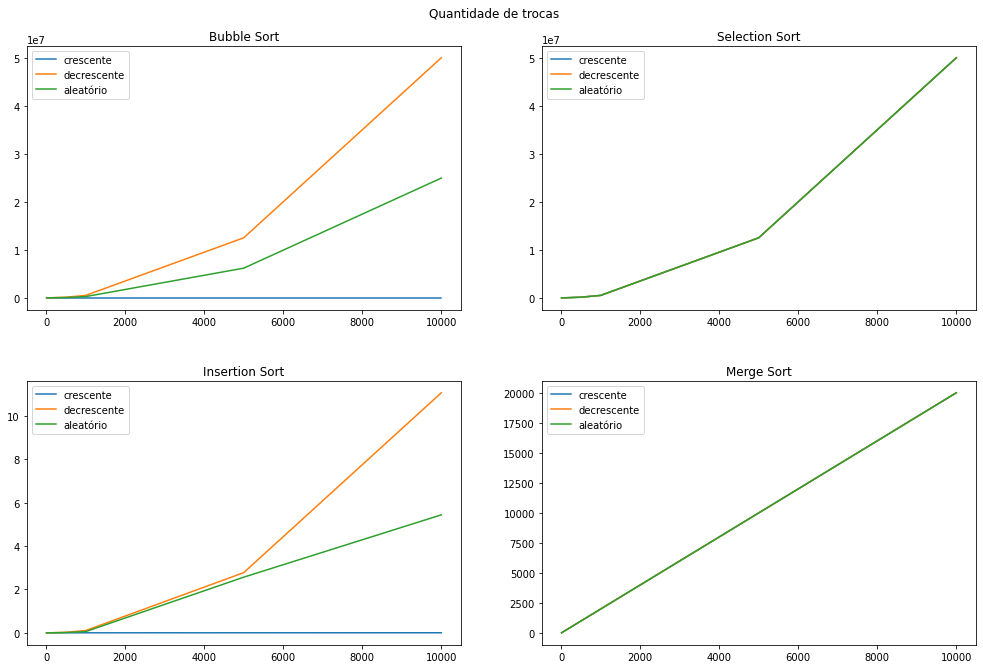

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=5.0)

fig.suptitle('Quantidade de trocas')

axs[0,0].plot([a[0] for a in performance_bubble_crescente], [a[3] for a in performance_bubble_crescente], label="crescente")
axs[0,0].plot([a[0] for a in performance_bubble_decrescente], [a[3] for a in performance_bubble_decrescente], label="decrescente")
axs[0,0].plot([a[0] for a in performance_bubble_aleatorio], [a[3] for a in performance_bubble_aleatorio], label="aleatório")

axs[0,0].set_title('Bubble Sort')
axs[0,0].legend()

axs[0,1].plot([a[0] for a in performance_selection_crescente], [a[3] for a in performance_selection_crescente], label="crescente")
axs[0,1].plot([a[0] for a in performance_selection_decrescente], [a[3] for a in performance_selection_decrescente], label="decrescente")
axs[0,1].plot([a[0] for a in performance_selection_aleatorio], [a[3] for a in performance_selection_aleatorio], label="aleatório")

axs[0,1].set_title('Selection Sort')
axs[0,1].legend()

axs[1,0].plot([a[0] for a in performance_insertion_crescente], [a[1] for a in performance_insertion_crescente], label="crescente")
axs[1,0].plot([a[0] for a in performance_insertion_decrescente], [a[1] for a in performance_insertion_decrescente], label="decrescente")
axs[1,0].plot([a[0] for a in performance_insertion_aleatorio], [a[1] for a in performance_insertion_aleatorio], label="aleatório")

axs[1,0].set_title('Insertion Sort')
axs[1,0].legend()

axs[1,1].plot([a[0] for a in performance_merge_crescente], [a[3] for a in performance_merge_crescente], label="crescente")
axs[1,1].plot([a[0] for a in performance_merge_decrescente], [a[3] for a in performance_merge_decrescente], label="decrescente")
axs[1,1].plot([a[0] for a in performance_merge_aleatorio], [a[3] for a in performance_merge_aleatorio], label="aleatório")

axs[1,1].set_title('Merge Sort')
axs[1,1].legend()

fig.show()

# CountingSort

O Counting Sort baseia-se na ideia de que um valor inteiro pode ser mapeado para o índice de mesmo valor em um array auxiliar. Essa estratégia nos impede, em um primeiro momento, de ordenar uma sequência com números negativos, pois o menor índice em um array é 0.

### Como funciona

A ideia é simples: basta identificarmos o menor elemento do array (menor) e usar esse valor como um “salto” para adicionar os elementos. É uma ideia similar a fazer um shift para a direita em todos os elementos.

###Algoritmo gerador de entradas

In [ ]:
import math
import random
import copy

for i in [1000,10000,100000,1000000]:
    data_crescente = [q for q in range(0,i)]
    data_decrescente = [q for q in range(i, 0, -1)]
    data_aleatorio = copy.deepcopy(data_decrescente)
    [random.shuffle(data_aleatorio)]

    rcresc = open(f'arquivos/{i}-cresc.txt',"w")
    for n in data_crescente:
        rcresc.write(f'{n}\n')
    rcresc.close()

    rdecresc = open(f'arquivos/{i}-decresc.txt',"w")
    for n in data_decrescente:
        rdecresc.write(f'{n}\n')
    rdecresc.close()

    ralea = open(f'arquivos/{i}-aleat.txt',"w")
    for n in data_aleatorio:
        ralea.write(f'{n}\n')
    ralea.close()

Counting Sort

In [ ]:
# Implementação do Counting Sort

def countingSort(array):
    size = len(array)
    output = [0] * size
    global increment
    global comparate

    # Inicializa o array de contagem
    maior = 0
    for i in range(0,size):
        if array[i] > maior:
            comparate += 1
            maior = array[i]

    count = [0] * (maior+1)

    # Incrementa um contador para cada elemento no array de contagem
    for i in range(0, size):
        count[array[i]] += 1
        increment += 1


    # Armazena o contador acumulado
    for i in range(1, maior+1):
        count[i] += count[i - 1]
        increment += 1

    # Encontra o índice de cada elemento do array original no array de contagem
    # Coloca os elementos no array de saída
    i = size - 1
    while i >= 0:
        output[count[array[i]] - 1] = array[i]
        count[array[i]] -= 1
        i -= 1
        increment += 1

    # Copia os elementos ordenados no array original
    for i in range(0, size):
        array[i] = output[i]

    return output


import time

qt = 1000
open('arquivos/CountingCresc.txt','w')
open('arquivos/CountingDecresc.txt','w')
open('arquivos/CountingAleat.txt','w')
while qt <= 1000000:

    # Relatorio Crescente
    data_cresc = [int(a) for a in open(f'arquivos/{qt}-cresc.txt').read().split('\n') if a != '']
 
    inicio = time.time()
    increment = 0
    comparate = 0

    size = len(data_cresc)

    countingSort(data_cresc)
    tempo = round((time.time() - inicio), 3)
    open(f'arquivos/CountingCresc.txt','a').write(f"{qt} valores: Tempo= {tempo} Incrementacoes= {increment} Comparacoes= {comparate}\n")

    # Relatorio Decrescente
    data_decresc = [int(a) for a in open(f'arquivos/{qt}-decresc.txt').read().split('\n') if a != '']
 
    inicio = time.time()
    increment = 0
    comparate = 0

    size = len(data_decresc)

    countingSort(data_decresc)
    tempo = round((time.time() - inicio), 3)
    open(f'arquivos/CountingDecresc.txt','a').write(f"{qt} valores: Tempo= {tempo} Incrementacoes= {increment} Comparacoes= {comparate}\n")

    # Relatorio Aleatorio
    data_aleat = [int(a) for a in open(f'arquivos/{qt}-aleat.txt').read().split('\n') if a != '']
 
    inicio = time.time()
    increment = 0
    comparate = 0

    size = len(data_aleat)

    countingSort(data_aleat)
    tempo = round((time.time() - inicio), 3)
    open(f'arquivos/CountingAleat.txt','a').write(f"{qt} valores: Tempo= {tempo} Incrementacoes= {increment} Comparacoes= {comparate}\n")
    qt *= 10


#Resultados

##  Dados de entrada em ordem crescente

### Tempo de execução

Quantidade de entrada | Tempo de execução
----------------------|-------------------
Até 1.000             |± 0.001 Frs
Até 10.000            |± 0.005 Frs
Até 100.000            |± 0.045 Frs
Até 1.000.000         |± 0.554 Frs

[Tempo Crescente](https://imgur.com/FrjC8nt)

### Incrementações

Quantidade de entrada | Incrementações
----------------------|-------------------
Até 1.000             |± 2999
Até 10.000            |± 29999
Até 100.000            |± 299999
Até 1.000.000         |± 2999999

[Incrementações Crescente](https://imgur.com/fuwsd1V)

##  Dados de entrada em ordem decrescente

### Tempo de execução

Quantidade de entrada | Tempo de execução
----------------------|-------------------
Até 1.000             |± 0.001 Frs
Até 10.000            |± 0.005 Frs
Até 100.000            |± 0.052 Frs
Até 1.000.000         |± 0.484 Frs

[Tempo Decrescente](https://imgur.com/1Ir7MV5)

### Incrementações

Quantidade de entrada | Incrementações
----------------------|-------------------
Até 1.000             |± 3000
Até 10.000            |± 30000
Até 100.000            |± 300000
Até 1.000.000         |± 3000000

[Incrementações Decrescente](https://imgur.com/cZFRw9Y)

##  Dados de entrada em ordem aleatória

### Tempo de execução

Quantidade de entrada | Tempo de execução
----------------------|-------------------
Até 1.000             |± 0.001 Frs
Até 10.000            |± 0.004 Frs
Até 100.000            |± 0.067 Frs
Até 1.000.000         |± 1.11 Frs

[Tempo Aleatória](https://imgur.com/W3lIijO)

### Incrementações

Quantidade de entrada | Incrementações
----------------------|-------------------
Até 1.000             |± 3000
Até 10.000            |± 30000
Até 100.000            |± 300000
Até 1.000.000         |± 3000000

[Incrementações Aleatória](https://imgur.com/OdXUeFC)



#Quick Sort

O quick sort utiliza a estratégia de dividir para conquistar para obter as mesmas vantagens do merge sort, mas sem usar espaço adicional. Em compensação, é possível que a lista possa não ser dividida ao meio. Quando isso ocorre, veremos que seu desempenho é reduzido.

In [ ]:
def partition(array, low, high):
  pivot = array[high]

  i = low - 1

  for j in range(low, high):
    if array[j] <= pivot:
      i = i + 1

      (array[i], array[j]) = (array[j], array[i])

  (array[i + 1], array[high]) = (array[high], array[i + 1])

  return i + 1

def quickSort(array, low, high):
  inicio = datetime.datetime.now()
  if low < high:

    pi = partition(array, low, high)

    quickSort(array, low, pi - 1)

    quickSort(array, pi + 1, high)
  return (datetime.datetime.now()-inicio).total_seconds()

In [ ]:
performance_quick_crescente = []
performance_quick_decrescente = []
performance_quick_aleatorio = []

for i in range(len(data_crescente[:4])):
  performance_quick_crescente.append([len(data_crescente[i]), quickSort(data_crescente[i].copy(), 0, len(data_crescente[i])-1)])
  performance_quick_decrescente.append([len(data_crescente[i]), quickSort(data_decrescente[i].copy(), 0, len(data_decrescente[i])-1)])
  performance_quick_aleatorio.append([len(data_crescente[i]), quickSort(data_aleatorio[i].copy(), 0, len(data_aleatorio[i])-1)])

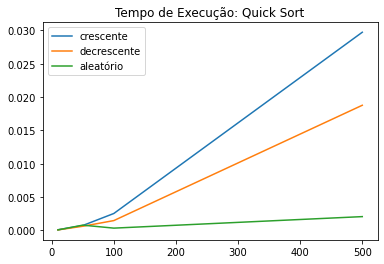

In [ ]:
plt.plot([a[0] for a in performance_quick_crescente], [a[1] for a in performance_quick_crescente], label="crescente")
plt.plot([a[0] for a in performance_quick_decrescente], [a[1] for a in performance_quick_decrescente], label="decrescente")
plt.plot([a[0] for a in performance_quick_aleatorio], [a[1] for a in performance_quick_aleatorio], label="aleatório")

plt.title('Tempo de Execução: Quick Sort')
plt.legend()


plt.show()

# RadixSort

O Radix sort é um algoritmo de ordenação rápido e estável que pode ser usado para ordenar itens que estão identificados por chaves únicas. Cada chave é uma cadeia de caracteres ou número, e o radix sort ordena estas chaves em qualquer ordem relacionada com a lexicografia.

## Como funciona

Quebrar uma chave em vários pedaços, que vão ser dígitos de um número em uma dada base (radix). Ordenar de acordo com o primeiro pedaço, números cujo dígito mais à esquerda começa com 0 vêm antes de números cujo dígito mais à esquerda é 1.

In [ ]:
def radixSort(array):

    max_element = max(array)

    place = 1
    while max_element // place > 0:
        countingSort(array, place)
        place *= 10

def countingSort(array, place):
    size = len(array)
    output = [0] * size
    count = [0] * 10

    for i in range(0, size):
        index = array[i] // place
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    i = size - 1
    while i >= 0:
        index = array[i] // place
        output[count[index % 10] - 1] = array[i]
        count[index % 10] -= 1
        i -= 1

    for i in range(0, size):
        array[i] = output[i]

## Tempo de execução com dados de entrada em ordem crescente

Quantidade de entrada | Tempo de execução
----------------------|-------------------
Até 10                |± 0.00002 Frs
Até 100               |± 0.00026 Frs
Até 1.000             |± 0.00174 Frs
Até 10.000            |± 0.07989 Frs
Até 20.000            |± 0.08041 Frs
Até 50.000            |± 0.15332 Frs
Até 100.000           |± 0.37807 Frs
Até 500.000           |± 1.57294 Frs
Até 1.000.000         |± 3.65740 Frs
Até 8.000.000         |± 33.13594 Frs

![crescente](https://i.imgur.com/phWEadS.png)

## Tempo de execução com dados de entrada em ordem decrescente

Quantidade de entrada | Tempo de execução
----------------------|-------------------
Até 10                |± 0.00003 Frs
Até 100               |± 0.00020 Frs
Até 1.000             |± 0.00190 Frs
Até 10.000            |± 0.04310 Frs
Até 20.000            |± 0.08288 Frs
Até 50.000            |± 0.17437 Frs
Até 100.000           |± 0.36945 Frs
Até 500.000           |± 1.64176 Frs
Até 1.000.000         |± 3.97745 Frs
Até 8.000.000         |± 28.20224 Frs

![decrescente](https://i.imgur.com/wti7vrK.png)


## Tempo de execução com dados de entrada em ordem aleatória

Quantidade de entrada | Tempo de execução
----------------------|-------------------
Até 10                |± 0.00002 Frs
Até 100               |± 0.00016 Frs
Até 1.000             |± 0.00177 Frs
Até 10.000            |± 0.04471 Frs
Até 20.000            |± 0.08281 Frs
Até 50.000            |± 0.20767 Frs
Até 100.000           |± 0.41240 Frs
Até 500.000           |± 0.43782 Frs
Até 1.000.000         |± 4.85507 Frs
Até 8.000.000         |± 41.69580 Frs

![aleatorio](https://i.imgur.com/VHqw1Zq.png)

## Comparaçao de tempo de execução entre os 3 tipos de entrada

![grafico](https://i.imgur.com/5wrkdOb.png)

# Heapsort

O algoritmo heapsort é um algoritmo de ordenação generalista, e faz parte da família de algoritmos de ordenação por seleção.

## Como funciona

Selecione o maior (ou menor) item do vetor e a seguir troque-o com o item que está na Heapsort a seguir troque-o com o item que está na última (ou primeira) posição do vetor; repita estas duas operações com os n - 1 itens restantes; depois com os n - 2 itens; e assim sucessivamente.

In [ ]:
def heapSort(arr):
    n = len(arr)
  
    for i in range(n//2, -1, -1):
      heapify(arr, n, i)
  
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
  
        heapify(arr, i, 0)

def heapify(arr, n, i):
      largest = i
      l = 2 * i + 1
      r = 2 * i + 2
  
      if l < n and arr[i] < arr[l]:
          largest = l
  
      if r < n and arr[largest] < arr[r]:
          largest = r
  
      if largest != i:
          arr[i], arr[largest] = arr[largest], arr[i]
          heapify(arr, n, largest)

##  Dados de entrada em ordem crescente

## Tempo de execução

Quantidade de entrada | Tempo de execução
----------------------|-------------------
Até 10                |± 0.00006 Frs
Até 100               |± 0.00076 Frs
Até 1.000             |± 0.00815 Frs
Até 10.000            |± 0.14023 Frs
Até 20.000            |± 0.42120 Frs
Até 50.000            |± 0.65709 Frs
Até 100.000           |± 1.24862 Frs
Até 500.000           |± 5.52888 Frs
Até 1.000.000         |± 11.56309 Frs
Até 8.000.000         |± 107.95581 Frs

![crescente](https://i.imgur.com/HnjtT1s.png)

## Trocas e comparações

Quantidade de entrada | Trocas          | Comparações
----------------------|-----------------|---------------
Até 10                |   58            | 104
Até 100               |   908           | 1920
Até 1.000             |   10.876         | 24.234
Até 10.000            |   236.934        | 548.425
Até 20.000            |   720.562        | 1.674.793
Até 50.000            |   1.755.054       | 4.097.049
Até 100.000           |   3.961.564       | 9.278.765
Até 500.000           |   13.796.262      | 32.562.901
Até 1.000.000         |   34.600.146      | 81.951.250
Até 8.000.000         |   226.349.772     | 540.144.989

![trocasComp](https://i.imgur.com/ucR10JP.png)

## Dados de entrada em ordem decrescente

## Tempo de execução

Quantidade de entrada | Tempo de execução
----------------------|-------------------
Até 10                |± 0.00010 Frs
Até 100               |± 0.00130 Frs
Até 1.000             |± 0.01604 Frs
Até 10.000            |± 0.22809 Frs
Até 20.000            |± 0.23978 Frs
Até 50.000            |± 0.49539 Frs
Até 100.000           |± 1.09723 Frs
Até 500.000           |± 5.99625 Frs
Até 1.000.000         |± 11.11512 Frs
Até 8.000.000         |± 90.84772 Frs

![decrescente](https://i.imgur.com/5oOSwDQ.png)

## Trocas e comparações

Quantidade de entrada | Trocas          | Comparações
----------------------|-----------------|---------------
Até 10                |   42            | 62
Até 100               |   744           | 1.430
Até 1.000             |   9.286          | 19.620
Até 10.000            |   212.318        | 475.668
Até 20.000            |   652.154        | 1.470.482
Até 50.000            |   1.593.374       | 3.615.538
Até 100.000           |   3.607.506       | 8.233.927
Até 500.000           |   12.726.648      | 29.337.647
Até 1.000.000         |   32.018.936      | 74.158.535
Até 8.000.000         |   188.465.011     | 440.479.145

![trocasComp](https://i.imgur.com/FvrTrPy.png)


## Dados de entrada em ordem aleatória

## Tempo de execução

Quantidade de entrada | Tempo de execução
----------------------|-------------------
Até 10                |± 0.00003 Frs
Até 100               |± 0.00037 Frs
Até 1.000             |± 0.00692 Frs
Até 10.000            |± 0.09506 Frs
Até 20.000            |± 0.20360 Frs
Até 50.000            |± 0.44586 Frs
Até 100.000           |± 0.98453 Frs
Até 500.000           |± 1.07104 Frs
Até 1.000.000         |± 10.92539 Frs
Até 8.000.000         |± 108.50647 Frs

![aleatorio](https://i.imgur.com/KqUsv2F.png)

## Trocas e comparações

Quantidade de entrada | Trocas          | Comparações   |
----------------------|-----------------|---------------
Até 10                |   56            | 98
Até 100               |   815           | 1627
Até 1.000             |   10.143         | 22.000
Até 10.000            |   224.962        | 511.205
Até 20.000            |   687.422        | 1.571.965
Até 50.000            |   1.677.206       | 3.854.992
Até 100.000           |   3.788.233       | 8.750.895
Até 500.000           |   6.054.124       | 14.003.127
Até 1.000.000         |   26.088.989      | 61.034.173
Até 8.000.000         |   211.542.990     | 500.221.039

![trocasComp](https://i.imgur.com/dYJytGC.png)

## Comparaçao entre os 3 tipos de entrada

## Execução

![grafico](https://i.imgur.com/i1dNbjH.png)